In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from apyori import apriori

import datetime

import statsmodels.api as sm

from scipy.stats import spearmanr 

from sklearn.impute import SimpleImputer

from scipy.spatial.distance import cdist 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import joblib

from math import radians, cos, sin, asin, sqrt
from numpy import mean
from numpy import std

## Wash Item Classfication

### Wash Item Dataset Preparation

In [60]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))
  
wi_df = pd.read_csv('./dataset_w_weather&rwi.csv')

### Wash Item Feature Selection (Boruta & RFE)

---------Top 10----------


,Features,Score
0,Date,1.00
21,latitude,1.00
26,Month,1.00
24,weather,1.00
22,longitude,1.00
28,rwi,1.00
7,Kids_Category,0.95
5,Age_Range,0.95
13,Pants_Colour,0.91
27,Year,0.86


---------Bottom 10----------


,Features,Score
19,buyDrinks,0.41
2,Race,0.32
15,Washer_No,0.32
17,Spectacles,0.27
12,shirt_type,0.23
23,Num_of_Baskets,0.18
4,Body_Size,0.14
8,Basket_Size,0.05
14,pants_type,0.05
3,Gender,0.00


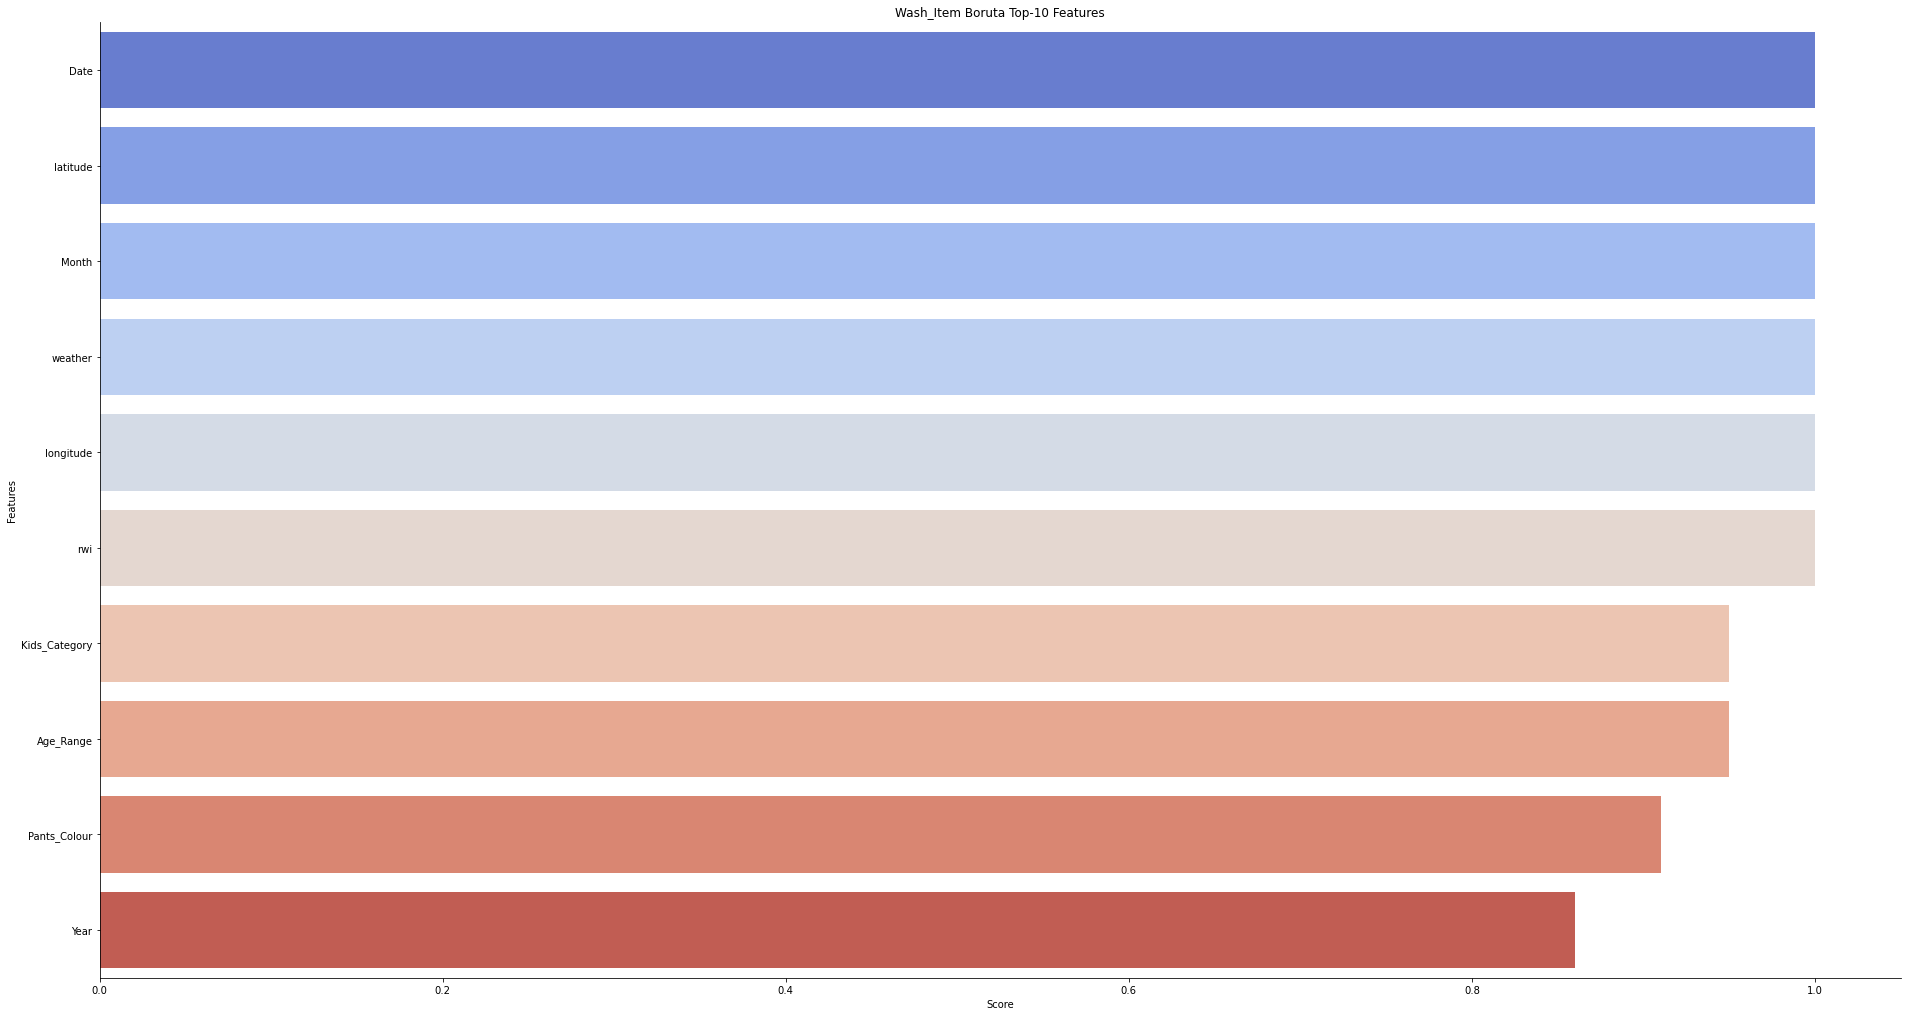

In [63]:
wi_df = wi_df.apply(LabelEncoder().fit_transform)

wi_x = wi_df.drop(['Wash_Item'], axis=1)
wi_y = wi_df['Wash_Item']

wi_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
wi_feat_selector = BorutaPy(wi_rf, n_estimators="auto", random_state=1)
wi_feat_selector.fit(wi_x.values, wi_y.values.ravel())

wi_boruta_score = ranking(list(map(float, wi_feat_selector.ranking_)), wi_x.columns, order=-1)
wi_boruta_score = pd.DataFrame(list(wi_boruta_score.items()), columns=['Features', 'Score'])
wi_boruta_score = wi_boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(wi_boruta_score.head(10))

print('---------Bottom 10----------')
display(wi_boruta_score.tail(10))
pd.DataFrame.to_csv(wi_boruta_score.head(10), 'WashItem_Boruta_Top10.csv')

sns_wi_boruta_plot = sns.catplot(x="Score", y="Features", data = wi_boruta_score[0:10], kind = "bar", height=14, aspect=1.9, palette='coolwarm')
plt.title("Wash_Item Boruta Top-10 Features")
sns_cwi_plot.figure.savefig('Wash_Item_Boruta.png')

---------Top 10----------


,Features,Score
21,latitude,1.00
26,Month,1.00
22,longitude,1.00
0,Date,0.96
28,rwi,0.92
24,weather,0.88
5,Age_Range,0.85
18,TimeSpent_minutes,0.81
7,Kids_Category,0.77
20,TotalSpent_RM,0.73


---------Bottom 10----------


,Features,Score
10,Attire,0.35
15,Washer_No,0.31
6,With_Kids,0.27
4,Body_Size,0.23
12,shirt_type,0.19
23,Num_of_Baskets,0.15
17,Spectacles,0.12
3,Gender,0.08
8,Basket_Size,0.04
14,pants_type,0.00


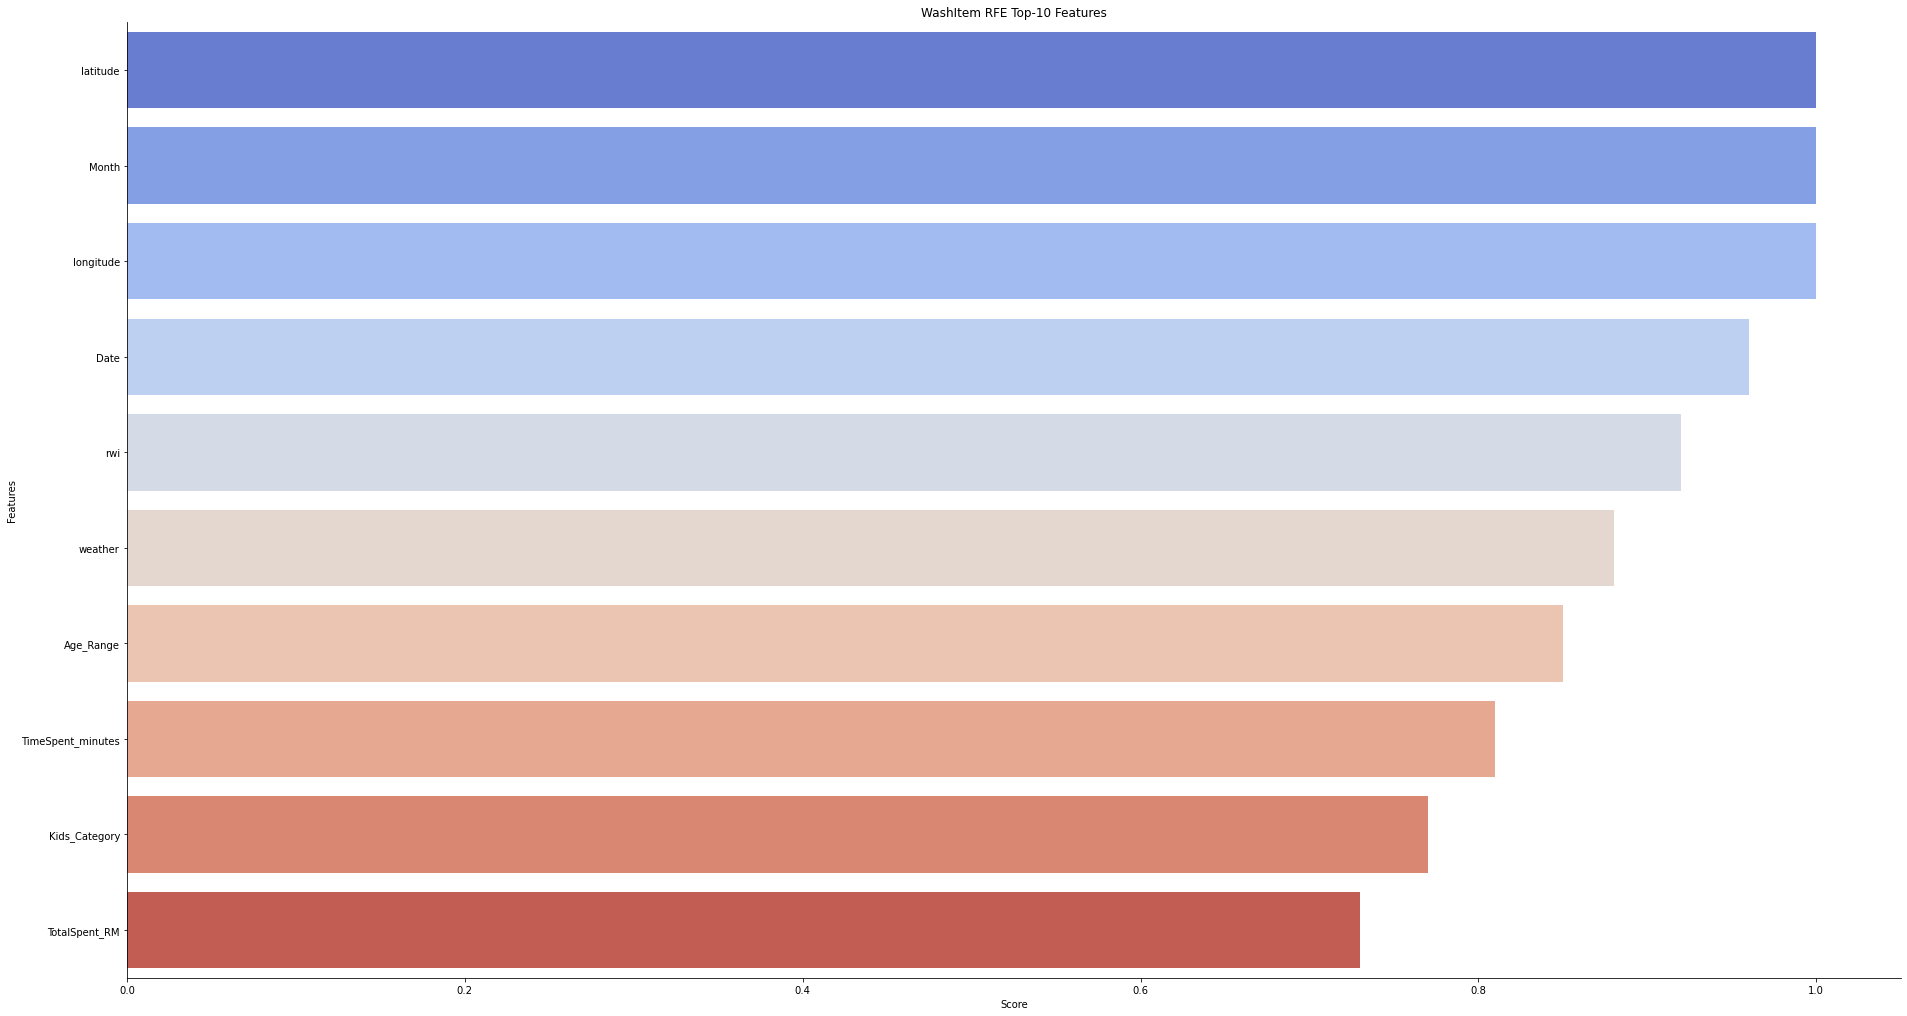

In [ ]:
wi_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
wi_rf.fit(wi_x, wi_y)
wi_rfe = RFECV(wi_rf, min_features_to_select = 1, cv = 3)
wi_rfe.fit(wi_x, wi_y)

wi_rfe_score = ranking(list(map(float, wi_rfe.ranking_)), wi_x.columns, order=-1)
wi_rfe_score = pd.DataFrame(list(wi_rfe_score.items()), columns=['Features', 'Score'])
wi_rfe_score = wi_rfe_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(wi_rfe_score.head(10))

print('---------Bottom 10----------')
display(wi_rfe_score.tail(10))
pd.DataFrame.to_csv(wi_rfe_score.head(10), 'WashItem_RFE_Top10.csv')

sns_wi_rfe_plot = sns.catplot(x="Score", y="Features", data = wi_rfe_score[0:10], kind = "bar", height=14, aspect=1.9, palette='coolwarm')
plt.title("WashItem RFE Top-10 Features")
sns_wi_rfe_plot.figure.savefig('WashItem_RFE.png')

In [94]:
wi_X = wi_df[["Month", "Date", "latitude" , "weather", "rwi", "Kids_Category", "Age_Range", "Pants_Colour", "TimeSpent_minutes"]]
wi_y = wi_df['Wash_Item']

X_wi_train, X_wi_test, y_wi_train, y_wi_test = train_test_split(wi_X, wi_y, test_size = 0.2, random_state = 10) 

## Naive Bayes

Accuracy on training set: 0.556
Accuracy on test set: 0.560


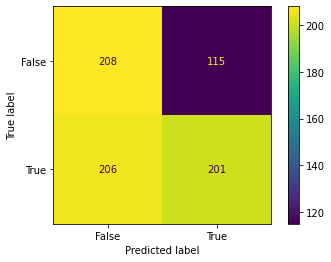

              precision    recall  f1-score     support
0              0.502415  0.643963  0.564450  323.000000
1              0.636076  0.493857  0.556017  407.000000
accuracy       0.560274  0.560274  0.560274    0.560274
macro avg      0.569246  0.568910  0.560234  730.000000
weighted avg   0.576936  0.560274  0.559748  730.000000
Class 0 ROC AUC OvR: 0.5869
Class 1 ROC AUC OvR: 0.5869
Average ROC AUC OvR: 0.5869


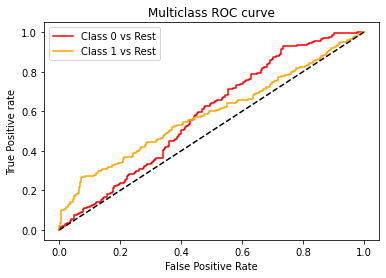

In [76]:
wi_nb = GaussianNB()
wi_nb.fit(X_wi_train, y_wi_train)
y_pred = wi_nb.predict(X_wi_test)
filename = 'Wash_Item_NB.sav'
joblib.dump(wi_nb, filename)

print("Accuracy on training set: {:.3f}".format(wi_nb.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_nb.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

confusion_matrix = confusion_matrix(y_wi_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

prob_NB = wi_nb.predict_proba(X_wi_test)
report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_nb.predict(X_wi_test), output_dict=True)
result = pd.DataFrame(report).transpose()
print(result)

fpr = {}
tpr = {}
thresh = {}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASHITEM_NB_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_NB_ROC.png')

## Random Forest

Accuracy on training set: 0.659
Accuracy on test set: 0.547


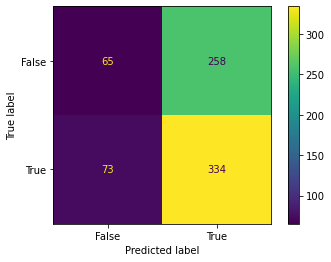

              precision    recall  f1-score   support

           0   0.471014  0.201238  0.281996       323
           1   0.564189  0.820639  0.668669       407

    accuracy                       0.546575       730
   macro avg   0.517602  0.510939  0.475332       730
weighted avg   0.522963  0.546575  0.497579       730

Class 0 ROC AUC OvR: 0.5863
Class 1 ROC AUC OvR: 0.5863
Average ROC AUC OvR: 0.5863


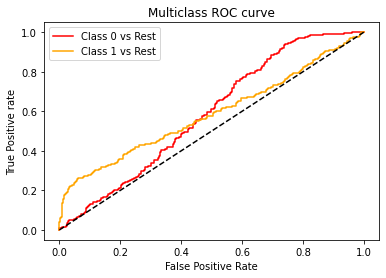

In [77]:
wi_rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
wi_rf.fit(X_wi_train, y_wi_train)
y_pred = wi_rf.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_rf.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_rf.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

confusion_matrix = confusion_matrix(y_wi_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

prob_RF = wi_rf.predict_proba(X_wi_test)

report = classification_report(digits=6,y_true=y_wi_test,y_pred=wi_rf.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASHITEM_RF_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_RF_ROC.png')

# KNN

Accuracy on training set: 0.761
Accuracy on test set: 0.515


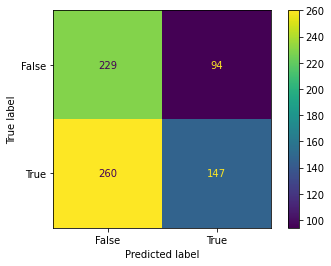

              precision    recall  f1-score   support

           0   0.468303  0.708978  0.564039       323
           1   0.609959  0.361179  0.453704       407

    accuracy                       0.515068       730
   macro avg   0.539131  0.535079  0.508872       730
weighted avg   0.547281  0.515068  0.502523       730

Class 0 ROC AUC OvR: 0.5587
Class 1 ROC AUC OvR: 0.5587
Average ROC AUC OvR: 0.5587


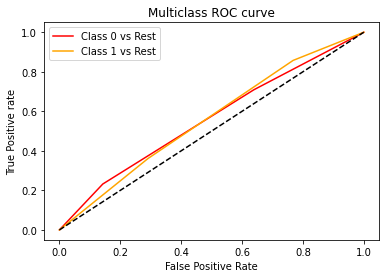

In [78]:
wi_KNN = KNeighborsClassifier(n_neighbors=2)
wi_KNN.fit(X_wi_train, y_wi_train)
y_pred = wi_KNN.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_KNN.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_KNN.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

confusion_matrix = confusion_matrix(y_wi_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

with open('WASHITEM_KNN_ACC.txt', 'w') as f:
    f.write("Accuracy on training set: {:.3f}\n".format(wi_KNN.score(X_wi_train, y_wi_train)))
    f.write("Accuracy on test set: {:.3f}\n".format(wi_KNN.score(X_wi_test, y_wi_test)))
    f.write('Mjority classifier Confusion Matrix\n')
    f.write(str(confusion_majority))
    
prob_KNN = wi_KNN.predict_proba(X_wi_test)

report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_KNN.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASHITEM_KNN_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_KNN_ROC.png')

## RF TUNING

Accuracy on training set: 0.659
Accuracy on test set: 0.547


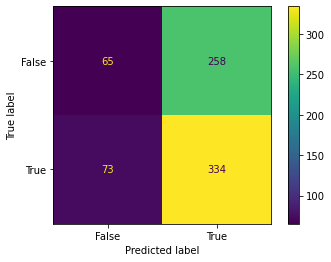

              precision    recall  f1-score   support

           0   0.471014  0.201238  0.281996       323
           1   0.564189  0.820639  0.668669       407

    accuracy                       0.546575       730
   macro avg   0.517602  0.510939  0.475332       730
weighted avg   0.522963  0.546575  0.497579       730

Class 0 ROC AUC OvR: 0.5863
Class 1 ROC AUC OvR: 0.5863
Average ROC AUC OvR: 0.5863


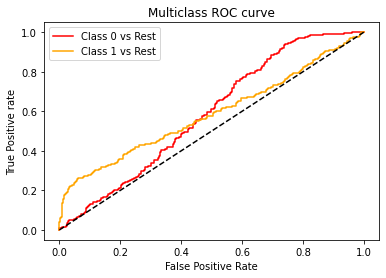

In [79]:
wi_rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
grid_values = {'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]}
grid_rf_acc = GridSearchCV(wi_rf, param_grid = grid_values, scoring = 'accuracy')
grid_rf_acc.fit(X_wi_train, y_wi_train)


wi_rf.fit(X_wi_train, y_wi_train)
y_pred = wi_rf.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_rf.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_rf.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

confusion_matrix = confusion_matrix(y_wi_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

prob_RF = wi_rf.predict_proba(X_wi_test)

report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_rf.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASH_ITEM_RF_1_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_RF_1_ROC.png')

## SVM

Accuracy on training set: 1.000
Accuracy on test set: 0.558
Precision Score : 0.5575342465753425
Recall Score : 1.0
F1 Score : 0.7159190853122251
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       323
           1   0.557534  1.000000  0.715919       407

    accuracy                       0.557534       730
   macro avg   0.278767  0.500000  0.357960       730
weighted avg   0.310844  0.557534  0.399149       730

Class 0 ROC AUC OvR: 0.5100
Class 1 ROC AUC OvR: 0.5063
Average ROC AUC OvR: 0.5082


/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


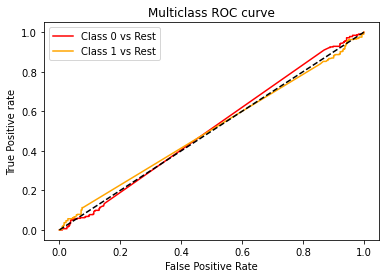

In [85]:
wi_svc = SVC(probability=True, random_state=1, kernel='rbf', C=10, gamma=0.1)
wi_svc.fit(X_wi_train, y_wi_train)
y_pred = wi_svc.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_svc.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_svc.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

# confusion_matrix = confusion_matrix(y_wi_test, y_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

prob_svc = wi_svc.predict_proba(X_wi_test)
report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_svc.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_svc.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_svc[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_svc[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASH_ITEM_SVC_1_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_SVC_1_ROC.png')

## Ensemble

In [88]:
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('knn', model2))
model3 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=10)

estimators.append(('rf', model3))
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_wi_train, y_wi_train)
y_pred = ensemble.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(ensemble.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(ensemble.score(X_wi_test, y_wi_test)))
print('Accuracy Score : ' + str(accuracy_score(y_wi_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

# confusion_majority = confusion_matrix(y_wi_test, y_pred)

prob_ESB = ensemble.predict_proba(X_wi_test)

sk_report = classification_report(digits=6,y_true=y_wi_test, y_pred=ensemble.predict(X_wi_test))
print(sk_report)

/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training set: 0.825
Accuracy on test set: 0.559
Accuracy Score : 0.5589041095890411
Precision Score : 0.5869120654396728
Recall Score : 0.7051597051597052
F1 Score : 0.6406249999999999
              precision    recall  f1-score   support

           0   0.502075  0.374613  0.429078       323
           1   0.586912  0.705160  0.640625       407

    accuracy                       0.558904       730
   macro avg   0.544493  0.539886  0.534852       730
weighted avg   0.549374  0.558904  0.547023       730



/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

>lr 0.534 (0.052)
>knn 0.530 (0.063)
>cart 0.554 (0.065)
>svm 0.530 (0.046)
>bayes 0.536 (0.042)


/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

>stacking 0.556 (0.056)


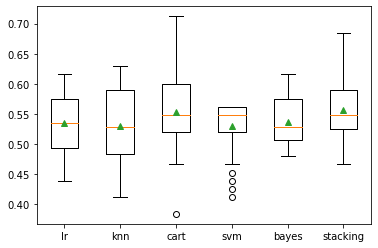

In [89]:
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
level1 = LogisticRegression()
stacked_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

models = dict()
models['lr'] = LogisticRegression()
models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
models['svm'] = SVC()
models['bayes'] = GaussianNB()
models['stacking'] = stacked_model

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_wi_test, y_wi_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

results, names = list(), list() 
for name, model in models.items():
  scores = evaluate_model(model, X_wi_train, y_wi_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## SMOTE

In [95]:
sm = SMOTE(random_state=0)
XSMOTE_wi_train, XSMOTE_wi_test, ySMOTE_wi_train, ySMOTE_wi_test = train_test_split(wi_X, wi_y.values.ravel(), test_size=0.4, random_state=10)
columns = XSMOTE_wi_train.columns
sm_data_X, sm_data_y = sm.fit_resample(XSMOTE_wi_train, ySMOTE_wi_train)
os_data_X = pd.DataFrame(data=sm_data_X, columns=columns)
os_data_y = pd.DataFrame(data=sm_data_y, columns=['Wash_Item'])


print("Oversampled  data has {} rows and {} columns".format(len(os_data_X),len(os_data_X.columns)))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['Wash_Item']==0])/len(os_data_X))
print("Proportion of 2 data in oversampled data is ",len(os_data_y[os_data_y['Wash_Item']==1])/len(os_data_X))

Oversampled  data has 2530 rows and 9 columns
Proportion of 1 data in oversampled data is  0.5
Proportion of 2 data in oversampled data is  0.5


In [96]:
XSMOTE_wi_train, XSMOTE_wi_test, ySMOTE_wi_train, ySMOTE_wi_test = train_test_split(os_data_X, os_data_y, test_size=0.4, random_state=10)
ySMOTE_wi_test = ySMOTE_wi_test.squeeze()

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_29658/620480864.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  wi_Smote_RF.fit(XSMOTE_wi_train, ySMOTE_wi_train)


Accuracy on training set: 0.825
Accuracy on test set: 0.559
Accuracy Score : 0.5589041095890411
Precision Score : 0.5869120654396728
Recall Score : 0.7051597051597052
F1 Score : 0.6406249999999999


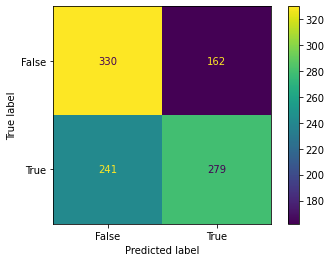

              precision    recall  f1-score   support

           0   0.577933  0.670732  0.620884       492
           1   0.632653  0.536538  0.580645       520

    accuracy                       0.601779      1012
   macro avg   0.605293  0.603635  0.600765      1012
weighted avg   0.606050  0.601779  0.600208      1012

Class 0 ROC AUC OvR: 0.6756
Class 1 ROC AUC OvR: 0.6756
Average ROC AUC OvR: 0.6756


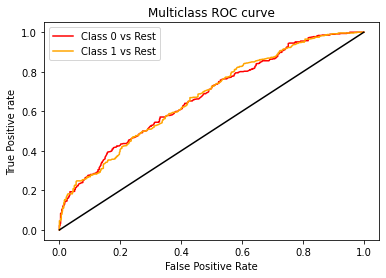

In [104]:
wi_Smote_RF = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=100)
wi_Smote_RF.fit(XSMOTE_wi_train, ySMOTE_wi_train)
ySMOTE_pred = wi_Smote_RF.predict(XSMOTE_wi_test)

# Calculate the overall accuracy on test set 
print("Accuracy on training set: {:.3f}".format(ensemble.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(ensemble.score(X_wi_test, y_wi_test)))
print('Accuracy Score : ' + str(accuracy_score(y_wi_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

confusion_matrix = confusion_matrix(ySMOTE_wi_test, ySMOTE_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

prob_RF = wi_Smote_RF.predict_proba(XSMOTE_wi_test)

report = classification_report(digits=6,y_true=ySMOTE_wi_test, y_pred=wi_Smote_RF.predict(XSMOTE_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_Smote_RF.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ySMOTE_wi_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = XSMOTE_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in ySMOTE_wi_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('SMOTE_WASH_ITEM_RF_1_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='-')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_WASHITEM_RF_1_ROC.png')

Accuracy on training set: 0.590
Accuracy on test set: 0.575
Precision Score : 0.667910447761194
Recall Score : 0.34423076923076923
F1 Score : 0.4543147208121827
              precision    recall  f1-score      support
0              0.541667  0.819106  0.652104   492.000000
1              0.667910  0.344231  0.454315   520.000000
accuracy       0.575099  0.575099  0.575099     0.575099
macro avg      0.604789  0.581668  0.553209  1012.000000
weighted avg   0.606535  0.575099  0.550473  1012.000000
Class 0 ROC AUC OvR: 0.5807
Class 1 ROC AUC OvR: 0.5807
Average ROC AUC OvR: 0.5807


/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


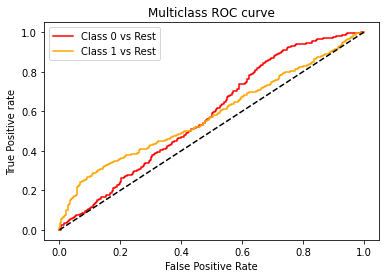

In [109]:
wi_nb_Smote = GaussianNB()
wi_nb_Smote.fit(XSMOTE_wi_train, ySMOTE_wi_train)
ySMOTE_pred = wi_nb_Smote.predict(XSMOTE_wi_test)
filename = 'SMOTE_Wash_Item_NB.sav'
joblib.dump(wi_nb_Smote, filename)

print("Accuracy on training set: {:.3f}".format(wi_nb_Smote.score(XSMOTE_wi_train, ySMOTE_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_nb_Smote.score(XSMOTE_wi_test, ySMOTE_wi_test)))
print('Precision Score : ' + str(precision_score(ySMOTE_wi_test,ySMOTE_pred)))
print('Recall Score : ' + str(recall_score(ySMOTE_wi_test,ySMOTE_pred)))
print('F1 Score : ' + str(f1_score(ySMOTE_wi_test,ySMOTE_pred)))

# confusion_matrix = confusion_matrix(ySMOTE_wi_test, ySMOTE_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

prob_NB = wi_nb_Smote.predict_proba(XSMOTE_wi_test)
report = classification_report(digits=6,y_true=ySMOTE_wi_test, y_pred=wi_nb_Smote.predict(XSMOTE_wi_test), output_dict=True)
result = pd.DataFrame(report).transpose()
print(result)

fpr = {}
tpr = {}
thresh = {}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_nb_Smote.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ySMOTE_wi_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = XSMOTE_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in ySMOTE_wi_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('SMOTE_WASHITEM_NB_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_WASHITEM_NB_ROC.png')